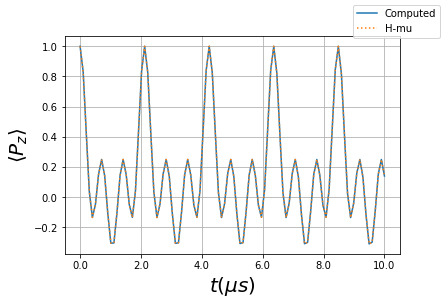

In [2]:
# Importing stuff...
%matplotlib inline
try:
    from undi import MuonNuclearInteraction
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../undi')
    from undi import MuonNuclearInteraction
import matplotlib.pyplot as plt
import numpy as np


"""
Here we always use SI in input.
"""

angtom=1.0e-10 # m
h=6.6260693e-34 # Js
hbar=h/(2*np.pi) # Js
mu_0=(4e-7)*np.pi # Tm A-1

# This is a linear F-mu-F along z
r=0.74 * angtom
atoms = [
            {'Position': np.array([0.000000  ,  0.  ,  0]),
            'Label': '1H',
            },
            
            {'Position': np.array([0.000000  ,  0.  ,  r ]),
            'Label': 'mu'}
        ]
# Time values, in seconds
tlist = np.linspace(0, 10e-6, 100)

# Define main class
NS = MuonNuclearInteraction(atoms)
# cutoff the dipolar interaction in order to avoid F-F term,
# then solve and store eigenvalues and eigenvectors (internally)
NS.load_or_solve_H()
# get Polarization
signal_FmuF = NS.generate_signal(tlist)

####################
# Plot the results #
####################
fig, axes = plt.subplots(1,1)
axes.plot(tlist, signal_FmuF, label='Computed', linestyle='-')

# Generate and plot analytical version for comparison
def plot_Hmu(interval,r):
    from numpy import cos, sin, sqrt
    omegad = (mu_0*NS.gammas['mu']*NS.gammas['H']*(hbar))
    omegad /=(4*np.pi*((r)**3))
    
    tomegad=interval*omegad
    y = (1./6.)*(1+cos(tomegad)+ 2.0 *cos(0.5*tomegad)+ 2.0*cos((3./2.)*tomegad))
    return y

axes.plot(tlist, plot_Hmu(tlist, r), label='H-mu', linestyle=':')

ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
axes.set_xlabel(r'$t (\mu s)$', fontsize=20)
axes.set_ylabel(r'$\left<P_z\right>$', fontsize=20);
axes.grid()
fig.legend()
plt.show()